# Lambda Functions & Pandas: Lesson and Exercises

This notebook begins with a review of Python’s lambda functions and then moves into working with data in pandas. The goal is to see how short, inline operations can be used in Python, and then how pandas provides more powerful and efficient ways of expressing the same kinds of ideas.

## Review of Lambda Functions
A **lambda function** is a way to define a very small function in a single line. These are sometimes called **anonymous functions** because they do not need a name. Instead, they are just written inline at the moment you need them.

The general form is:

```python
lambda parameters: expression
```

Notice that there is no `return` keyword. Whatever expression you write after the colon is the value that gets returned.

Let’s look at some simple examples.

In [ ]:
# Single parameter
x = lambda a: a + 7
print(x(5))          # 12

# Multiple parameters
y = lambda a, b, c: a * b * c
print(y(2, 3, 4))    # 24

# Works with different types (string repetition)
z = lambda a: a * 3
print(z("Happy birthday to you!\n"))
print(z(5))          # 15

In [6]:
# Working with lists
my_list = [3, 4, 64, 2, 45, 23, 12, 34, 146]

# Map: transform each element
mapped_twice = list(map(lambda v: 2 * v, my_list))
print(mapped_twice)

# Conditional expression inside a lambda
labels = list(map(lambda v: "high" if v > 10 else "low", my_list))
print(labels)

# Sorted with key: sort by last digit
print(sorted(my_list, key=lambda v: v % 10))

# Filter: keep only values > 10
print(list(filter(lambda v: v > 10, my_list)))

[6, 8, 128, 4, 90, 46, 24, 68, 292]
['low', 'low', 'high', 'low', 'high', 'high', 'high', 'high', 'high']
[2, 12, 3, 23, 4, 64, 34, 45, 146]
[64, 45, 23, 12, 34, 146]


#### Try it yourself
- Write your own lambda that subtracts 5 from a number.
- Write a lambda that takes two numbers and returns their average.
- Use `map` with a lambda to square every number in a list.

In [7]:
x = lambda a: a -5
print(x(5))

y = lambda a,b: (a + b) /2
print(y(3,9))

w = list(map(lambda a: a*a,my_list))
print(w)

0
6.0
[9, 16, 4096, 4, 2025, 529, 144, 1156, 21316]


## Comparing Pure Python and Pandas
The Python examples above are helpful, but they don’t always read very clearly, and they can become slow on large datasets. Pandas provides ways to express the same ideas in a style that is often both easier to read and much faster.

In [9]:
# Pure Python with sorted + key
my_list = [23, 4, 64, 45, 12]
print(sorted(my_list, key=lambda v: v % 10))

# Pandas equivalent
import pandas as pd
df = pd.DataFrame({"Value": [23, 4, 64, 45, 12]})
df.sort_values(by="Value", key=lambda col: col % 10)

[12, 23, 4, 64, 45]


,Value
4,12
0,23
1,4
2,64
3,45


In [10]:
# Pure Python with filter
my_list = [3, 4, 64, 2, 45, 23, 12, 34, 146]
print(list(filter(lambda v: v > 10, my_list)))

# Pandas equivalent: Boolean indexing
df = pd.DataFrame({"Value": my_list})
df[df["Value"] > 10]

[64, 45, 23, 12, 34, 146]


,Value
2,64
4,45
5,23
6,12
7,34
8,146


#### Try it yourself
- Recreate the sorted example in pandas, but sort by the first digit instead of the last.
- Filter the DataFrame to keep only even numbers.

In [14]:
my_list = [3, 4, 64, 2, 45, 23, 12, 34,100, 3690]
print(sorted(my_list, key=lambda v: v % 100))

df = pd.DataFrame({"Value":my_list})

print(df.sort_values(by="Value", key=lambda col: col.astype(str).str[0].astype(int)))

[100, 2, 3, 4, 12, 23, 34, 45, 64, 3690]
   Value
6     12
8    100
3      2
5     23
0      3
7     34
9   3690
1      4
4     45
2     64


## Back to Pandas
Let’s now set up our environment and start working with the CMPD incident dataset.

In [16]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make figures larger for readability
plt.rcParams['figure.figsize'] = (15, 7)

data_file = 'cmpd_Incident_2016.csv'  # ensure this file is present in the working directory

# Read data
crime_df = pd.read_csv(data_file, encoding="ISO-8859-1")

# Inspect columns to know what fields we have
crime_df.columns.tolist()

['Complaint_No',
 'Block_No',
 'Direction',
 'Street_Name',
 'Street_Type',
 'Suffix',
 'Apt_No',
 'City',
 'State',
 'Zipcode',
 'X_Coordinate',
 'Y_Coordinate',
 'Division',
 'Reported_Date',
 'Location_Desc',
 'Location_Type',
 'Incident_From_Date',
 'Incident_From_Time',
 'Incident_to_date',
 'Incident_to_Time',
 'Place1',
 'Place2',
 'Clearance_Status',
 'Clearance_Date',
 'Case_Status',
 'Reporting_Agency',
 'NIBRS_Hi_Class']

In [ ]:
# what does our data look like
crime_df.shape

### Understanding the Index
When pandas displays a DataFrame, the leftmost numbers are the index. These are row labels, not a data column. The default is zero-based. If we prefer a 1-based index and a name for presentation, we can set it:

In [17]:
crime_df.index = range(1, len(crime_df) + 1)
crime_df.index.name = 'id'
crime_df.head()

,Complaint_No,Block_No,Direction,Street_Name,Street_Type,Suffix,Apt_No,City,State,Zipcode,...,Incident_From_Time,Incident_to_date,Incident_to_Time,Place1,Place2,Clearance_Status,Clearance_Date,Case_Status,Reporting_Agency,NIBRS_Hi_Class
id,,,,,,,,,,,,,,,,,,,,,
1,2.020000e+13,2219,,HEATHER GLEN,LN,,,CHARLOTTE,NC,28208,...,1930,12/31/15,2330.0,Residential,Private Residence ...,Open ...,,Further Investigation,Charlotte-Mecklenburg Police Department,Motor Vehicle Theft
2,2.020000e+13,8120,E,W T HARRIS,BV,,,CHARLOTTE,NC,28215,...,1,NaN,NaN,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Hit And Run (Property Only)
3,2.020000e+13,1415,,TOM HUNTER,RD,,220,CHARLOTTE,NC,28213,...,0,NaN,NaN,Commercial Place,Hotel/Motel ...,Normal Clearance - Cleared by Arrest ...,1/1/16,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault
4,2.020000e+13,,,ORR,RD,,58,CHARLOTTE,NC,,...,0,1/1/16,6.0,Residential,Mobile Home/Houseboat ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault
5,2.020000e+13,6500,N,TRYON,ST,,,CHARLOTTE,NC,28213,...,5,1/1/16,6.0,Open Area,Street/Highway ...,Open ...,,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault


## Data Quality: Missing or Misleading Values
Real-world datasets often contain missing values, and they may be recorded in inconsistent ways. It’s important to standardize these so pandas recognizes them as missing.

In [18]:
# Replace empty strings with NA (after stripping spaces)
crime_df = crime_df.map(lambda s: pd.NA if isinstance(s, str) and s.strip() == "" else s)

# Treat common placeholders as missing
placeholders = {"N/A", "NA", "NULL", "NONE", "UNKNOWN", "UNSPECIFIED", "(null)"}
crime_df = crime_df.map(lambda s: pd.NA if isinstance(s, str) and s.strip().upper() in placeholders else s)

# Quick check: which columns have the most missing values?
crime_df.isna().sum().sort_values(ascending=False).head(10)

Suffix              99463
Apt_No              85635
Direction           83728
Clearance_Date      60120
Zipcode             28012
Incident_to_Time    26576
Incident_to_date    26576
X_Coordinate         6737
Y_Coordinate         6737
Block_No             5687
dtype: int64

#### To Do #1
- Which block or location field has the most reported incidents?  

In [20]:
crime_df["Block_No"].value_counts()
crime_df["Block_No"].value_counts().sum()

np.int64(94170)

#### To Do #2
- What problem in the dataset does this highlight?  


#### To Do #3
- How could you address it?

## Analyzing a Specific Crime
Suppose we are interested in incidents related to **Theft**.

In [ ]:
# Convert to string in case of missing/non-string values, then search for 'theft' (case-insensitive)
crime_type = crime_df['NIBRS_Hi_Class'].astype(str)
is_theft = crime_type.str.contains('theft', case=False, na=False)

# Count theft incidents and compute percentage of total
theft_count = is_theft.sum()
theft_pct = 100 * theft_count / len(crime_df)

theft_count, theft_pct

(np.int64(25245), np.float64(25.28115204742782))

In [26]:
crime_df['NIBRS_Hi_Class'].value_counts()

NIBRS_Hi_Class
Theft From Motor Vehicle        10965
Simple Assault                   9035
All Other Thefts                 8792
Other Unlisted Non-Criminal      7476
Damage/Vandalism Of Property     6593
                                ...  
Assisting Prostitution              5
Betting/Wagering                    3
Incest                              3
Welfare Fraud                       3
Negligent Manslaughter              2
Name: count, Length: 64, dtype: int64

#### To Do #4
- How many incidents are related to Theft?  

#### To Do #5
- What percentage of the total does this represent?  

#### To Do #6
- Which three crime categories are the most common overall?

## Re-expressing Field Values (Dates → Months)
How about if we want to get a sense of the distribution of incidents over the months of the year? Do have the necessary data to accomplish this?
If we look at our fields we can see the Reported_Date field includes this data but not in the format we want. 

In [ ]:
type(crime_df['Reported_Date'][1]) 

Notice that we are using index 1 because we remapped the index for this dataframe to start at 1 rather than 0.
Now that we know the datatype for this field is a string we can either use string methods to create a new mapping to month names or we convert/parse it with `pd.to_datetime`, then use the `.dt` accessor to extract parts like month:

In [ ]:
# Parse date strings into datetime; invalid parses become NaT
crime_df['Reported_Date'] = pd.to_datetime(
    crime_df['Reported_Date'], errors='coerce'
)

# Extract month number and month name using .dt accessors
crime_df['Month'] = crime_df['Reported_Date'].dt.month
crime_df['MonthName'] = crime_df['Reported_Date'].dt.month_name()

crime_df[['Reported_Date', 'Month', 'MonthName']].head()

In [ ]:
# Bar chart by MonthName without enforcing order (will default to alphabetical)
ax = crime_df['MonthName'].value_counts().plot(kind='bar', rot=45)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents')
ax.set_title('Incidents by Month (Unordered)')
plt.show()

In [ ]:
# Define calendar order and set MonthName as an ordered categorical for proper month sequence
month_map = {1: "January", 2: "February", 3: "March", 4: "April",
             5: "May", 6: "June", 7: "July", 8: "August",
             9: "September", 10: "October", 11: "November", 12: "December"}
ordered_months = list(month_map.values())
crime_df['MonthName'] = pd.Categorical(
    crime_df['MonthName'], categories=ordered_months, ordered=True
)

# Plot again with chronological order
ax = crime_df['MonthName'].value_counts().reindex(ordered_months).plot(kind='bar', rot=45)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents')
ax.set_title('Incidents by Month (Chronological)')
plt.show()

#### To Do #7
- Plot a bar chart of incidents related to Theft by numeric month.  

#### To Do #8
- Which month has the highest number of Theft related incidents?  

#### To Do #9
- Create a line plot of incidents and Theft related incidents over months and compare the two.

## Deriving and Ordering Day of Week
We can use the same mapping-and-ordering idea with **day of the week**. Without ordering, weekdays will sort alphabetically; with a categorical order, they appear Monday through Sunday.

In [46]:
# Extract the weekday name from Reported_Date
crime_df['Weekday'] = crime_df['Reported_Date'].dt.day_name()
crime_df[['Reported_Date', 'Weekday']].head()


,Reported_Date,Weekday
id,,
1,2016-01-01,Friday
2,2016-01-01,Friday
3,2016-01-01,Friday
4,2016-01-01,Friday
5,2016-01-01,Friday


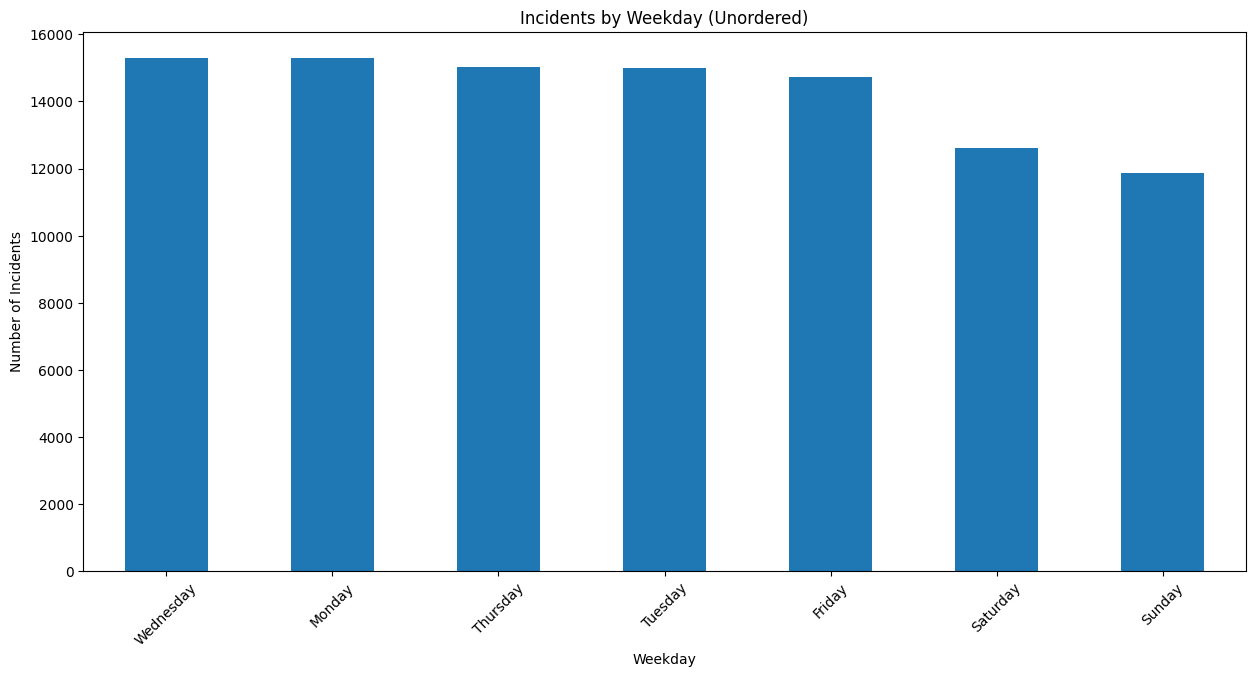

In [47]:
# Plot without ordering: labels will be alphabetical (e.g., Friday, Monday, Saturday, ...)
ax = crime_df['Weekday'].value_counts().plot(kind='bar', rot=45)
ax.set_xlabel('Weekday')
ax.set_ylabel('Number of Incidents')
ax.set_title('Incidents by Weekday (Unordered)')
plt.show()

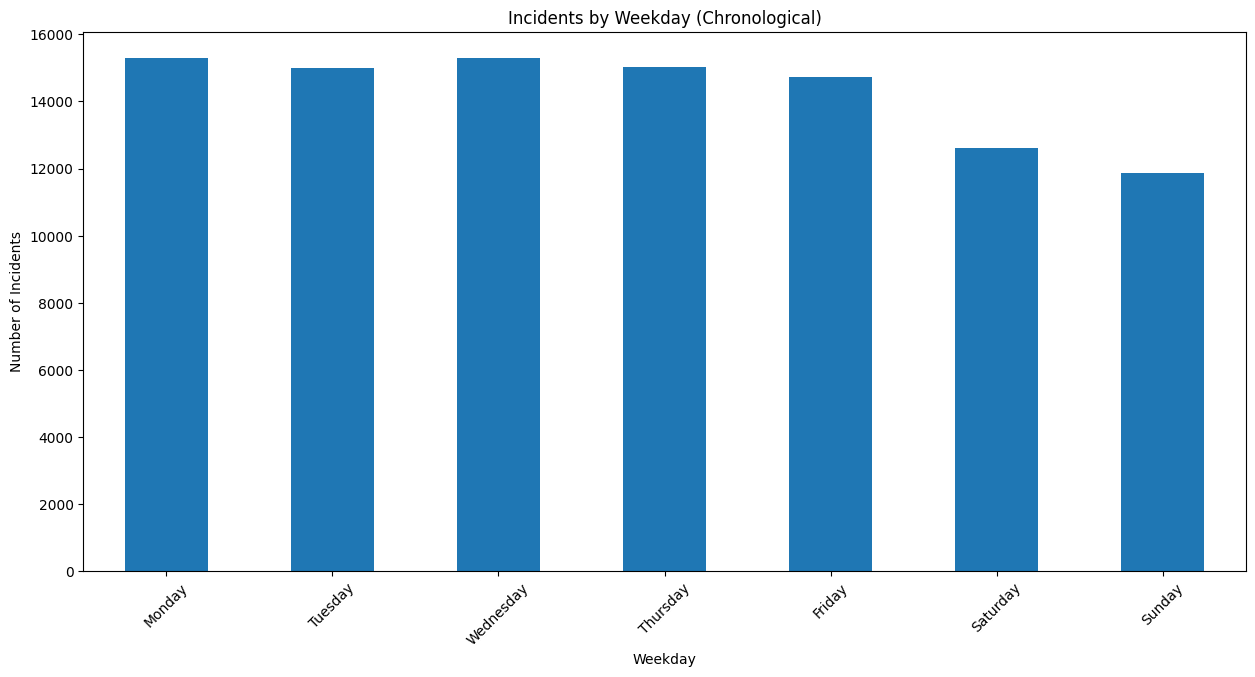

In [48]:
# Define the calendar order for weekdays and set as ordered categorical
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_df['Weekday'] = pd.Categorical(crime_df['Weekday'], categories=weekday_order, ordered=True)

# Plot again with correct weekday order
ax = crime_df['Weekday'].value_counts().reindex(weekday_order).plot(kind='bar', rot=45)
ax.set_xlabel('Weekday')
ax.set_ylabel('Number of Incidents')
ax.set_title('Incidents by Weekday (Chronological)')
plt.show()

#### To Do #10
- Compute the proportion of incidents that occur on weekends vs. weekdays.  

In [49]:
weekend = {'Saturday','Sunday'} # define weekend days
is_weekend = crime_df['Weekday'].isin(weekend) # create a mask for weekend day or not
wknd_count = int(is_weekend.sum()) # count of weekend incidents 
wkday_count = int((~is_weekend).sum()) # count of weekday incidents
total = crime_df.shape[0] #should match wknd_count+wkday_count
wknd_pct = 100 * wknd_count / total if total else float('nan') # percentage of weekend incidents. divide-by-zero errors are nan
wkday_pct = 100 * wkday_count / total if total else float('nan') # percentage of weekday incidents. divide-by-zero errors are nan
print(f'Weekend incidents: {wknd_count} ({wknd_pct:.2f}%)')
print(f'Weekday incidents: {wkday_count} ({wkday_pct:.2f}%)')

Weekend incidents: 24481 (24.52%)
Weekday incidents: 75376 (75.48%)


## Merging Data
There might be scenarios where you have two different sources for your data and you wish to combine them for analysis and modeling.

Let's look at a simple example of how to join to data frames.

In our original 2016 CMPD incident dataset the police division where an incident is reported is indicated using the Division number. We have another dataset with the mapping between division numbers and their names.

We can join the CMPD dataset with division mapping data.

In [50]:
# Load the division mapping (e.g., columns: division_number, division_name)
df2 = pd.read_csv('cmpd_divisions.csv')
# 1) Align column names
df2 = df2.rename(columns={'division_number': 'Division'})

# 2) Align dtypes for the join key
crime_df['Division'] = crime_df['Division'].astype(str)
df2['Division'] = df2['Division'].astype(str)

# 3) Merge
merged_df = pd.merge(crime_df, df2, how='left', on='Division')
merged_df.head()

,Complaint_No,Block_No,Direction,Street_Name,Street_Type,Suffix,Apt_No,City,State,Zipcode,...,Place2,Clearance_Status,Clearance_Date,Case_Status,Reporting_Agency,NIBRS_Hi_Class,Month,MonthName,Weekday,division_name
0,2.020000e+13,2219,<NA>,HEATHER GLEN,LN,<NA>,<NA>,CHARLOTTE,NC,28208,...,Private Residence ...,Open ...,<NA>,Further Investigation,Charlotte-Mecklenburg Police Department,Motor Vehicle Theft,1,January,Friday,Freedom Division
1,2.020000e+13,8120,E,W T HARRIS,BV,<NA>,<NA>,CHARLOTTE,NC,28215,...,Street/Highway ...,Open ...,<NA>,Inactive,Charlotte-Mecklenburg Police Department,Hit And Run (Property Only),1,January,Friday,Hickory Grove Division
2,2.020000e+13,1415,<NA>,TOM HUNTER,RD,<NA>,220,CHARLOTTE,NC,28213,...,Hotel/Motel ...,Normal Clearance - Cleared by Arrest ...,1/1/16,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault,1,January,Friday,North Tryon Division
3,2.020000e+13,<NA>,<NA>,ORR,RD,<NA>,58,CHARLOTTE,NC,<NA>,...,Mobile Home/Houseboat ...,Open ...,<NA>,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault,1,January,Friday,North Tryon Division
4,2.020000e+13,6500,N,TRYON,ST,<NA>,<NA>,CHARLOTTE,NC,28213,...,Street/Highway ...,Open ...,<NA>,Inactive,Charlotte-Mecklenburg Police Department,Aggravated Assault,1,January,Friday,North Tryon Division


#### To Do #11
- How many rows in `merged_df` have missing division names after the join? Why might that happen?  


In [51]:

print('Using division name column from mapping:', "division_name")

missing_after_join = merged_df["division_name"].isna().sum()
total_rows = len(merged_df)
print(f'Missing division names after join: {missing_after_join} of {total_rows}')

Using division name column from mapping: division_name
Missing division names after join: 89 of 107003


 #### To Do #12
Create a bar chart showing incidents by division name and find the division with the fewest incidents.

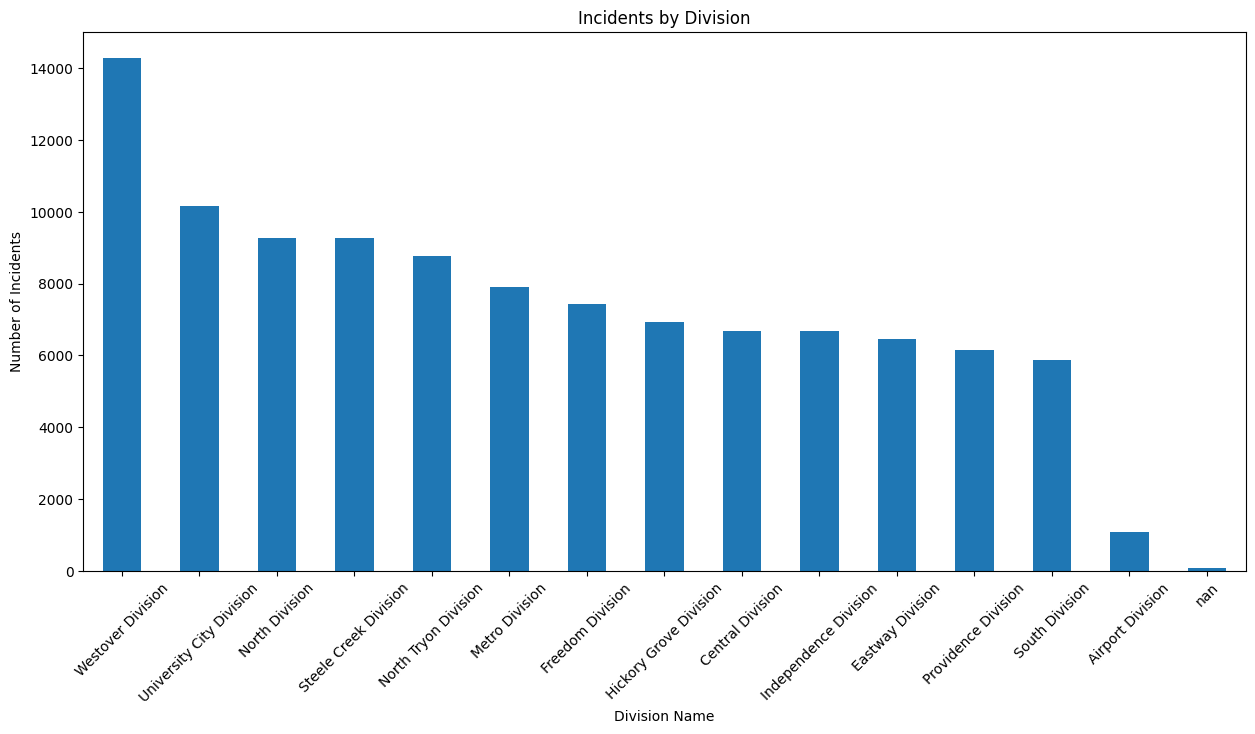

In [52]:
ax = merged_df["division_name"].value_counts(dropna=False).plot(kind='bar', rot=45)
ax.set_xlabel('Division Name')
ax.set_ylabel('Number of Incidents')
ax.set_title('Incidents by Division')
plt.show()

AJ was here